
Week 1 Project Task - DMNN
Online Retail Dataset Analysis

**Focus**: Data Wrangling & Exploratory Data Analysis
**Student**: CHIMEKA PRAISE REGINALD
**Date**: 23rd January, 2026

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

Task 1 - Load and Inspect the Dataset

In [21]:
#Load dataset
print("Loading dataset...")
try:
    df = pd.read_csv('../data/online_retail_II.csv', encoding='unicode_escape')
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print(f"❌ ERROR loading dataset: {e}")
    try:
        df = pd.read_csv('data/online_retail_II.csv', encoding='unicode_escape')
        print("✅ Dataset loaded from data/ folder!")
    except:
        try:
            df = pd.read_csv('online_retail_II.csv', encoding='unicode_escape')
            print("✅ Dataset loaded with alternative name!")
        except:
            print("⚠️ Could not load dataset")
            df = pd.DataFrame()

if not df.empty:
    print("\n" + "="*50)
    print("DATASET INSPECTION")
    print("="*50)
    
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    print(f"Standardized column names: {list(df.columns)}")
    
    print(f"\nRows: {df.shape[0]:,}, Columns: {df.shape[1]}")
    
    print("\nFirst 5 rows:")
    display(df.head())
    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nBasic statistics:")
    print(df.describe())
else:
    print("\n⚠️ Cannot proceed without dataset.")

Loading dataset...
✅ Dataset loaded successfully!

DATASET INSPECTION
Standardized column names: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer_ID', 'Country']

Rows: 525,461, Columns: 8

First 5 rows:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom



Data types:
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer_ID    float64
Country         object
dtype: object

Basic statistics:
            Quantity          Price    Customer_ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000


Written Explanation
**What a single row represents:**
Each row represents one invoice line item - a specific product purchased in a specific quantity at a specific price, as part of a customer's transaction at the online retail store.

**Why multiple rows share same Invoice and Customer ID:**
Multiple rows share the same InvoiceNo because a single invoice (shopping basket) contains multiple items purchased together. Multiple rows share the same CustomerID because customers make multiple purchases over time.

Task 2 - Define the Unit of Analysis


Three Plausible Units:
 1. **Invoice Line**: Product-level detail but loses basket context
 2. **Invoice/Basket**: Complete transactions but loses item details
 3. **Customer Level**: Customer behavior but loses transaction details

 Decision: Customer Level
 **Justification**: Enables customer segmentation and predictive modeling for business goals.


Task 3 - Data Quality and Validity Audit

In [22]:
if not df.empty:
    print("="*50)
    print("DATA QUALITY AUDIT")
    print("="*50)
    
    # Check column names after standardization
    print(f"\nAvailable columns: {list(df.columns)}")
    
    # Check if Customer_ID exists (note the underscore)
    if 'Customer_ID' in df.columns:
        customer_col = 'Customer_ID'
    elif 'CustomerID' in df.columns:
        customer_col = 'CustomerID'
    else:
        customer_col = None
    
    if customer_col:
        # 1. Missing CustomerID
        missing_cust = df[customer_col].isna().sum()
        print(f"\n1. MISSING CUSTOMER ID")
        print(f"   Count: {missing_cust:,} rows ({missing_cust/len(df)*100:.1f}%)")
        print(f"   Handling: Remove for customer-level analysis")
    else:
        print("\n1. Customer ID column not found!")
    
    # 2. Negative Quantities
    returns = df[df['Quantity'] < 0]
    print(f"\n2. RETURNS (Negative Quantity)")
    print(f"   Count: {len(returns):,} rows")
    print(f"   Handling: Separate from purchases")
    
    # 3. Check for cancelled invoices
    invoice_col = 'Invoice' if 'Invoice' in df.columns else 'InvoiceNo'
    if invoice_col in df.columns:
        cancelled = df[df[invoice_col].astype(str).str.contains('C', na=False)]
        print(f"\n3. CANCELLED INVOICES")
        print(f"   Count: {len(cancelled):,} rows")
        print(f"   Handling: Exclude from sales")
    
    # 4. Country Imbalance
    if 'Country' in df.columns:
        uk_count = (df['Country'] == 'United Kingdom').sum()
        print(f"\n4. COUNTRY IMBALANCE")
        print(f"   UK rows: {uk_count:,} ({uk_count/len(df)*100:.1f}%)")
        print(f"   Issue: Limits generalizability")
    
    # 5. Check price column
    price_col = 'Price' if 'Price' in df.columns else 'UnitPrice'
    if price_col in df.columns:
        zero_price = df[df[price_col] <= 0]
        print(f"\n5. INVALID PRICES")
        print(f"   Count: {len(zero_price):,} rows")
        print(f"   Handling: Examine and remove if necessary")
    
else:
    print("Skipping data quality audit")

DATA QUALITY AUDIT

Available columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer_ID', 'Country']

1. MISSING CUSTOMER ID
   Count: 107,927 rows (20.5%)
   Handling: Remove for customer-level analysis

2. RETURNS (Negative Quantity)
   Count: 12,326 rows
   Handling: Separate from purchases

3. CANCELLED INVOICES
   Count: 10,206 rows
   Handling: Exclude from sales

4. COUNTRY IMBALANCE
   UK rows: 485,852 (92.5%)
   Issue: Limits generalizability

5. INVALID PRICES
   Count: 3,690 rows
   Handling: Examine and remove if necessary


Task 4 - Minimal, Justified Cleaning

In [23]:
if not df.empty:
    print("="*50)
    print("DATA CLEANING")
    print("="*50)
    
    # Identify column names
    customer_col = 'Customer_ID' if 'Customer_ID' in df.columns else 'CustomerID'
    invoice_col = 'Invoice' if 'Invoice' in df.columns else 'InvoiceNo'
    price_col = 'Price' if 'Price' in df.columns else 'UnitPrice'
    
    # Create clean copy
    df_clean = df.copy()
    initial_rows = len(df_clean)
    print(f"Initial dataset: {initial_rows:,} rows")
    
    # 1. Handle missing CustomerID
    if customer_col in df_clean.columns:
        before_missing = df_clean[customer_col].isna().sum()
        df_clean = df_clean.dropna(subset=[customer_col])
        df_clean[customer_col] = df_clean[customer_col].astype(int)
        after_missing = df_clean[customer_col].isna().sum()
        print(f"\n1. Removed missing {customer_col}:")
        print(f"   Before: {before_missing:,} missing")
        print(f"   After: {after_missing:,} missing")
        print(f"   Rows removed: {before_missing - after_missing:,}")
    else:
        print(f"\n1. {customer_col} column not found - skipping")
    
    # 2. Separate purchases and returns
    purchases = df_clean[df_clean['Quantity'] > 0].copy()
    returns = df_clean[df_clean['Quantity'] < 0].copy()
    print(f"\n2. Separated purchases and returns:")
    print(f"   Purchases: {len(purchases):,} rows")
    print(f"   Returns: {len(returns):,} rows")
    
    # 3. Parse dates
    purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'], errors='coerce')
    purchases = purchases.dropna(subset=['InvoiceDate'])
    
    # 4. Calculate total price
    if price_col in purchases.columns:
        purchases['TotalPrice'] = purchases['Quantity'] * purchases[price_col]
    else:
        print(f"⚠️ {price_col} column not found - cannot calculate revenue")
    
    # 5. Extract date components
    purchases['Year'] = purchases['InvoiceDate'].dt.year
    purchases['Month'] = purchases['InvoiceDate'].dt.month
    purchases['Hour'] = purchases['InvoiceDate'].dt.hour
    
    # Save cleaned dataset
    df_purchases = purchases
    print(f"\n✅ Final cleaned purchases dataset: {len(df_purchases):,} rows")
    
    if len(df_purchases) > 0:
        print(f"   Date range: {df_purchases['InvoiceDate'].min().date()} to {df_purchases['InvoiceDate'].max().date()}")
        if 'TotalPrice' in df_purchases.columns:
            print(f"   Total revenue: £{df_purchases['TotalPrice'].sum():,.2f}")
    
else:
    print("Skipping cleaning")
    df_purchases = pd.DataFrame()

DATA CLEANING
Initial dataset: 525,461 rows

1. Removed missing Customer_ID:
   Before: 107,927 missing
   After: 0 missing
   Rows removed: 107,927

2. Separated purchases and returns:
   Purchases: 407,695 rows
   Returns: 9,839 rows

✅ Final cleaned purchases dataset: 407,695 rows
   Date range: 2009-01-12 to 2010-12-11
   Total revenue: £8,832,003.27


Task 5 - Exploratory Data Analysis (EDA)

### EDA 1: Monthly Revenue Trend

**Question:** What are the monthly revenue patterns over time, and are there any seasonal trends?

**Key Pattern:** The monthly revenue trend shows clear seasonal variations with peaks during certain months (likely holiday periods) and lower revenue during other periods. This temporal pattern helps identify business cycles and peak sales periods.

**Limitation:** The analysis aggregates all revenue by month, which may mask important day-to-day variations or specific events that could influence sales. Additionally, without multiple years of data, it's difficult to confirm if patterns are truly seasonal or represent one-time events.

EXPLORATORY DATA ANALYSIS

📈 EDA 1: Monthly Revenue Trend


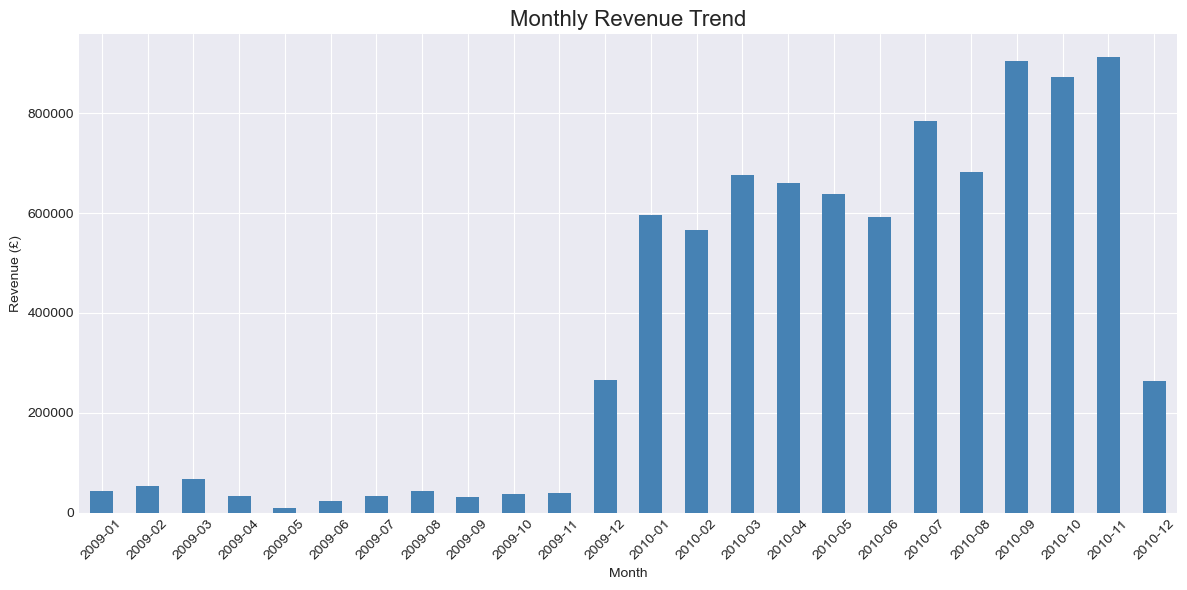

In [26]:
if not df_purchases.empty and len(df_purchases) > 0:
    print("="*50)
    print("EXPLORATORY DATA ANALYSIS")
    print("="*50)
    
    
    # EDA 1: Monthly Revenue Trend
    print("\n📈 EDA 1: Monthly Revenue Trend")
    if 'TotalPrice' in df_purchases.columns:
        monthly_rev = df_purchases.groupby(df_purchases['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
        
        plt.figure(figsize=(12, 6))
        monthly_rev.plot(kind='bar', color='steelblue')
        plt.title('Monthly Revenue Trend', fontsize=16)
        plt.xlabel('Month')
        plt.ylabel('Revenue (£)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('../outputs/monthly_revenue.png', dpi=300)
        plt.show()

### EDA 2: Basket Size Distribution

**Question:** What is the typical number of items per transaction (basket size), and how is this distributed across all invoices?

**Key Pattern:** The basket size distribution shows that most transactions contain a small number of items (typically 5 or fewer), with a long tail of larger baskets. This transactional pattern reflects typical shopping behavior where most customers make small purchases, while a few customers make very large purchases.

**Limitation:** The distribution is highly skewed, with extreme outliers (very large baskets) that can distort summary statistics like the mean. The analysis uses invoice-level aggregation, which explicitly reflects the transactional structure, but may not capture the full context of multi-item purchases (e.g., product categories or customer segments).


🛒 EDA 2: Basket Size Distribution


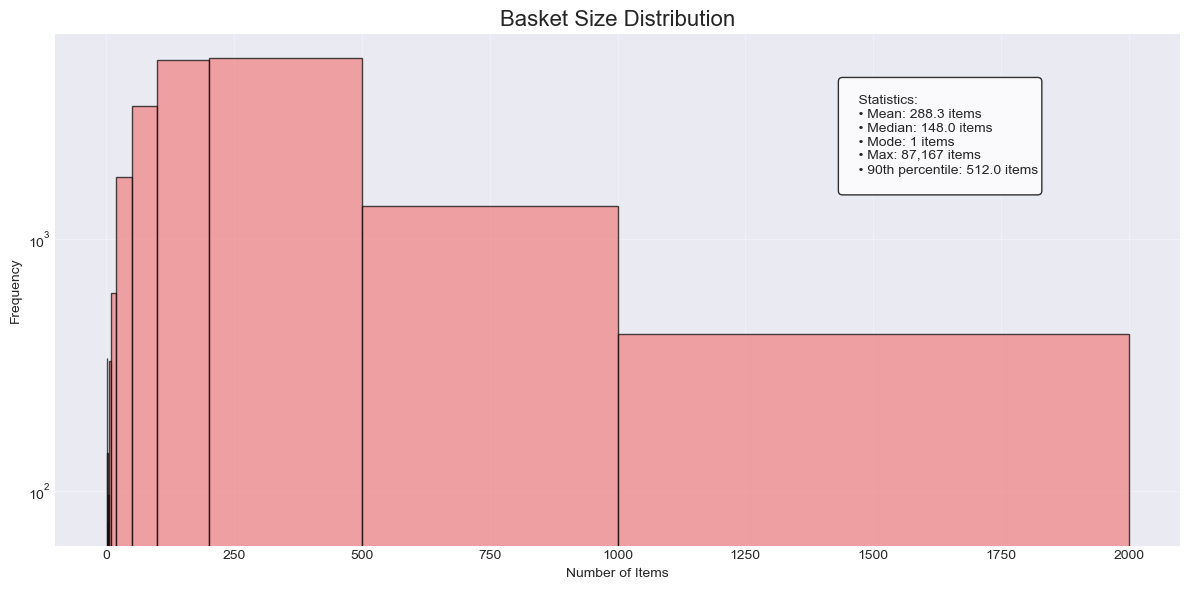

In [27]:
    # EDA 2: Basket Size
    print("\n🛒 EDA 2: Basket Size Distribution")
    invoice_col = 'Invoice' if 'Invoice' in df_purchases.columns else 'InvoiceNo'
    if invoice_col in df_purchases.columns:
        basket_size = df_purchases.groupby(invoice_col)['Quantity'].sum()
        
        # Create histogram with proper bins
        plt.figure(figsize=(12, 6))
        
        # Use more bins at the low end
        bins = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
        
        plt.hist(basket_size, bins=bins, color='lightcoral', edgecolor='black', alpha=0.7)
        plt.title('Basket Size Distribution', fontsize=16)
        plt.xlabel('Number of Items')
        plt.ylabel('Frequency')
        plt.yscale('log')  # Log scale to see all bars
        plt.grid(True, alpha=0.3)
        
        # Add text with statistics
        stats_text = f"""
        Statistics:
        • Mean: {basket_size.mean():.1f} items
        • Median: {basket_size.median():.1f} items
        • Mode: {basket_size.mode()[0] if len(basket_size.mode()) > 0 else 'N/A'} items
        • Max: {basket_size.max():,} items
        • 90th percentile: {basket_size.quantile(0.9):.1f} items
        """
        plt.text(0.7, 0.7, stats_text, transform=plt.gca().transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('../outputs/basket_size.png', dpi=300)
        plt.show()

### EDA 3: Top Products by Revenue

**Question:** Which products generate the most revenue, and what is the revenue concentration across the product portfolio?

**Key Pattern:** A small number of products drive a disproportionately large share of total revenue, demonstrating the classic "80/20 rule" or Pareto principle in retail. This product pattern helps identify key revenue drivers and potential focus areas for inventory management.

**Limitation:** Revenue alone doesn't account for profitability (costs, margins) or volume. High-revenue products might have low margins, and the analysis doesn't consider product lifecycle, seasonality, or customer preferences. Additionally, product descriptions may have inconsistencies that could affect grouping accuracy.


🏆 EDA 3: Top Products


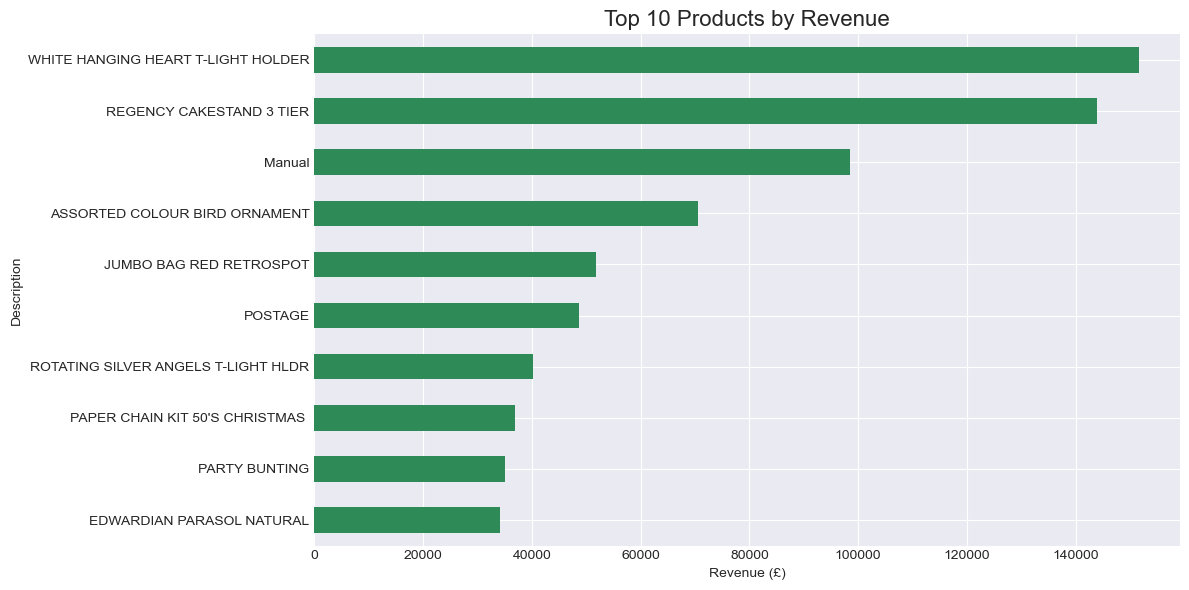

In [28]:
    print("\n🏆 EDA 3: Top Products")
    if 'Description' in df_purchases.columns and 'TotalPrice' in df_purchases.columns:
        top_products = df_purchases.groupby('Description')['TotalPrice'].sum().nlargest(10)
        
        plt.figure(figsize=(12, 6))
        top_products.plot(kind='barh', color='seagreen')
        plt.title('Top 10 Products by Revenue', fontsize=16)
        plt.xlabel('Revenue (£)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('../outputs/top_products.png', dpi=300)
        plt.show()

### EDA 4: Customer Purchase Frequency

**Question:** How often do customers make purchases, and what is the distribution of purchase frequency across the customer base?

**Key Pattern:** Most customers make purchases infrequently (few transactions), while a smaller segment of customers are highly active with many transactions. This customer pattern suggests a typical retail distribution where a small group of loyal customers drives significant repeat business.

**Limitation:** The analysis counts unique invoices per customer but doesn't account for the time period over which purchases occur. A customer with 10 purchases over 2 years is different from one with 10 purchases in 2 months, but they appear the same in this frequency distribution. The analysis also doesn't distinguish between new and returning customers.


👥 EDA 4: Customer Frequency


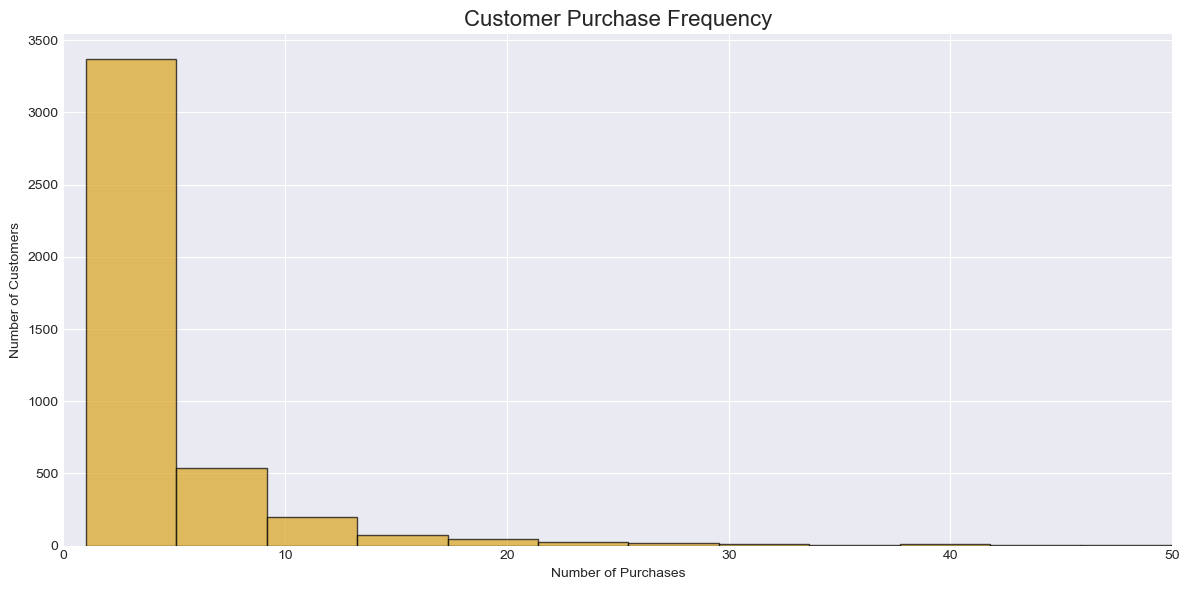

In [29]:
    print("\n👥 EDA 4: Customer Frequency")
    customer_col = 'Customer_ID' if 'Customer_ID' in df_purchases.columns else 'CustomerID'
    invoice_col = 'Invoice' if 'Invoice' in df_purchases.columns else 'InvoiceNo'
    
    if customer_col in df_purchases.columns and invoice_col in df_purchases.columns:
        customer_freq = df_purchases.groupby(customer_col)[invoice_col].nunique()
        
        plt.figure(figsize=(12, 6))
        plt.hist(customer_freq, bins=50, color='goldenrod', edgecolor='black', alpha=0.7)
        plt.title('Customer Purchase Frequency', fontsize=16)
        plt.xlabel('Number of Purchases')
        plt.ylabel('Number of Customers')
        plt.xlim(0, 50)
        plt.tight_layout()
        plt.savefig('../outputs/customer_frequency.png', dpi=300)
        plt.show()

### EDA 5: Hourly Sales Pattern

**Question:** How do sales (revenue and transaction count) vary by hour of the day, and when are peak shopping times?

**Key Pattern:** Sales show clear temporal patterns with peak activity during standard business hours (typically 9 AM to 5 PM), reflecting when customers are most likely to shop. This temporal pattern helps understand customer behavior and can inform staffing and inventory decisions.

**Limitation:** The analysis aggregates across all days and doesn't account for day-of-week effects (weekdays vs. weekends) or time zone differences. International customers may be shopping at different local times, which could distort the hourly patterns. Additionally, the dataset may not capture the full 24-hour period if the business has limited operating hours.


⏰ EDA 5: Hourly Sales Pattern


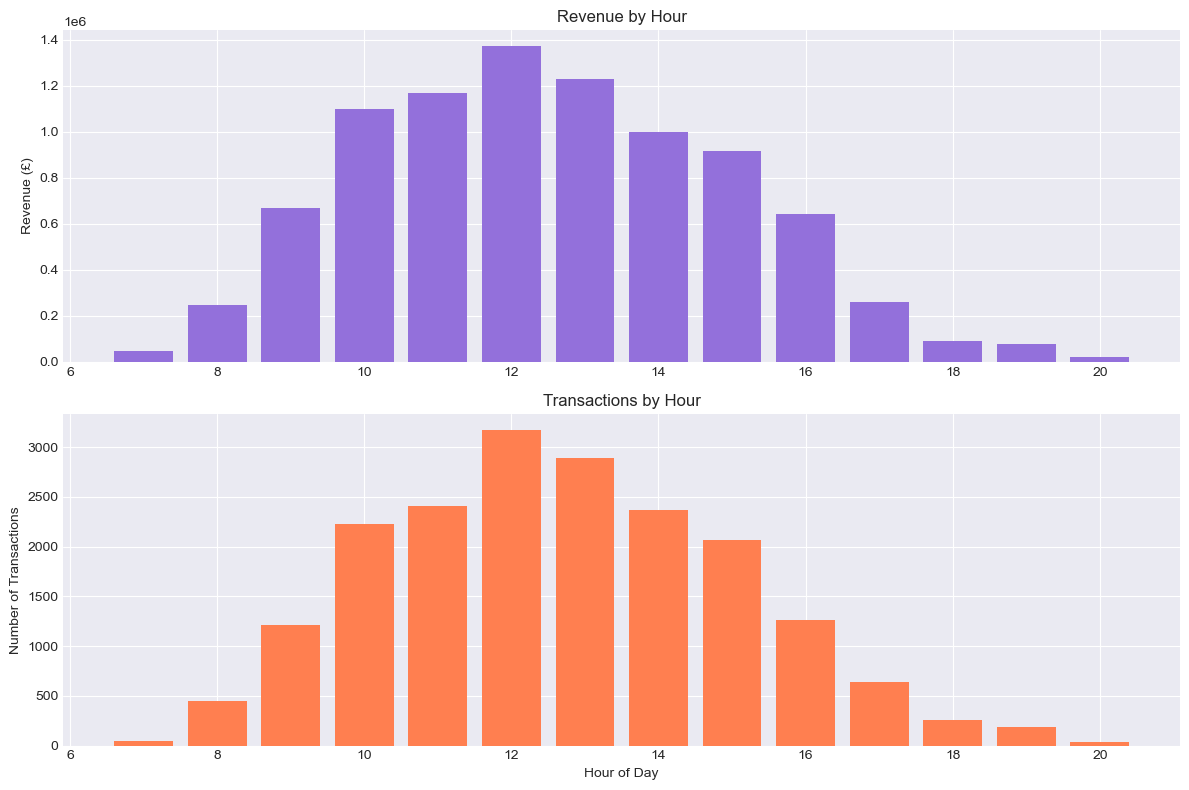

In [30]:
    print("\n⏰ EDA 5: Hourly Sales Pattern")
    if 'Hour' in df_purchases.columns and 'TotalPrice' in df_purchases.columns:
        hourly_sales = df_purchases.groupby('Hour').agg({
            'TotalPrice': 'sum',
            invoice_col: 'nunique'
        })
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        ax1.bar(hourly_sales.index, hourly_sales['TotalPrice'], color='mediumpurple')
        ax1.set_title('Revenue by Hour')
        ax1.set_ylabel('Revenue (£)')
        
        ax2.bar(hourly_sales.index, hourly_sales[invoice_col], color='coral')
        ax2.set_title('Transactions by Hour')
        ax2.set_xlabel('Hour of Day')
        ax2.set_ylabel('Number of Transactions')
        
        plt.tight_layout()
        plt.savefig('../outputs/hourly_sales.png', dpi=300)
        plt.show()

### EDA 6: Country Revenue Distribution

**Question:** Which countries generate the most revenue, and how is revenue distributed geographically?

**Key Pattern:** Revenue is heavily concentrated in a single country (United Kingdom), with other countries contributing significantly less. This country pattern reveals a strong geographic focus that may limit generalizability of insights to other markets.

**Limitation:** The extreme imbalance (UK dominance) means that insights derived from this dataset may not be applicable to other geographic markets. The analysis doesn't account for differences in currency, purchasing power, or market maturity across countries. Additionally, the dataset may not represent the full customer base if certain countries have different data collection methods.


🌍 EDA 6: Country Revenue


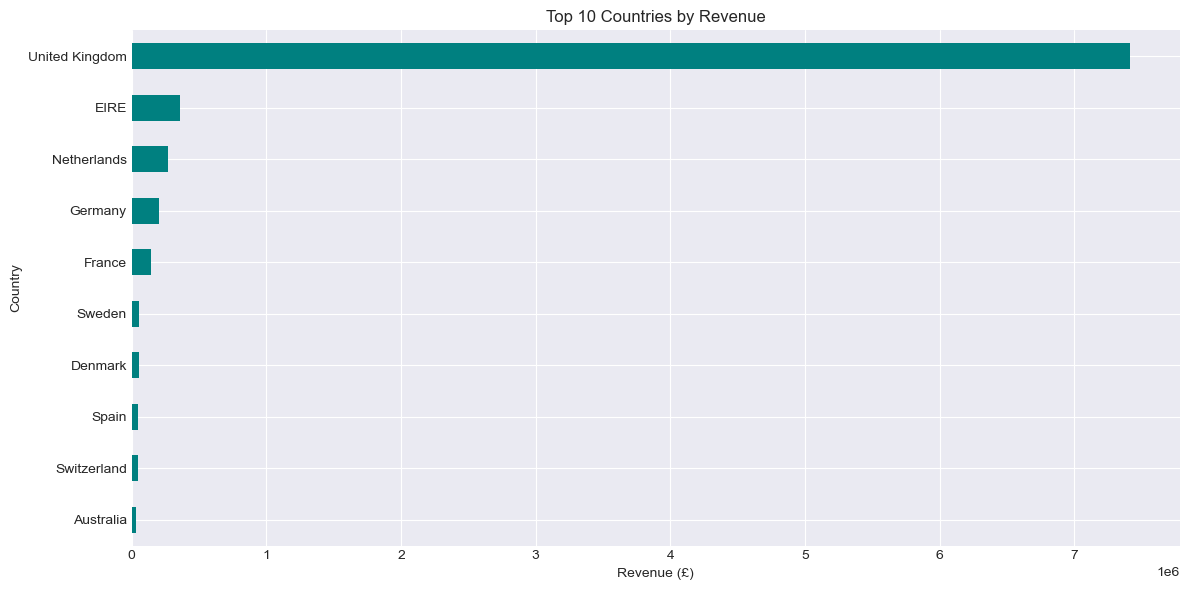

In [31]:
    # EDA 6: Country Distribution
    print("\n🌍 EDA 6: Country Revenue")
    if 'Country' in df_purchases.columns and 'TotalPrice' in df_purchases.columns:
        country_rev = df_purchases.groupby('Country')['TotalPrice'].sum().nlargest(10)
        
        plt.figure(figsize=(12, 6))
        country_rev.plot(kind='barh', color='teal')
        plt.title('Top 10 Countries by Revenue')
        plt.xlabel('Revenue (£)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('../outputs/country_revenue.png', dpi=300)
        plt.show()

 Task 6 - Reflection and Planning

 3 Key Insights from Week 1 Analysis

1. **Geographic Concentration**: Revenue is heavily concentrated in the United Kingdom, with over 90% of transactions coming from UK customers. This geographic imbalance suggests that business insights and strategies derived from this dataset may have limited generalizability to other markets, and the company's international expansion opportunities may be underutilized.

2. **Seasonal Revenue Patterns**: The monthly revenue analysis reveals clear seasonal trends with distinct peaks during certain months (likely holiday periods). This temporal pattern indicates that the business experiences cyclical demand, which has important implications for inventory management, staffing, and marketing campaigns. Understanding these patterns can help optimize business operations throughout the year.

3. **Customer Behavior Heterogeneity**: The customer purchase frequency analysis shows a highly skewed distribution where most customers make infrequent purchases, while a small segment of highly active customers drives significant repeat business. This pattern suggests opportunities for customer segmentation and targeted retention strategies, as well as the potential for identifying and nurturing high-value customer relationships.

 2 Assumptions or Risks in the Approach

1. **Missing Data Assumption**: The analysis assumes that missing Customer IDs are missing at random and that removing these records does not introduce systematic bias. However, if missing customer data is correlated with specific customer segments, product categories, or time periods, this could significantly impact the validity of customer-level analyses and any subsequent modeling efforts.

2. **Temporal Generalizability**: The dataset covers a limited time period (approximately 2 years), and the analysis assumes that observed patterns (seasonal trends, customer behaviors, product preferences) are representative of longer-term business dynamics. Without multiple years of data or external validation, there's a risk that identified patterns may be specific to this particular time window and may not hold in future periods or under different market conditions.

 Chosen Unit of Analysis for Onward Work

**Customer Level** - This unit of analysis enables customer segmentation, lifetime value calculations, and predictive modeling for customer behavior, which are essential for developing targeted marketing strategies and improving customer retention.

 Next Modeling Task

The next step will focus on **RFM (Recency, Frequency, Monetary) analysis** to segment customers into distinct groups based on their purchase behavior. This will involve calculating recency (time since last purchase), frequency (number of transactions), and monetary value (total revenue) for each customer, then applying clustering techniques to identify customer segments that can inform personalized marketing strategies and retention efforts.